In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from scipy import stats

In [3]:
df_cfpdss = pd.read_csv("./cfpdss/cfpdss.csv")
df_cfpdss.head()

,c5,c6,c7,c8,c9,n0,n1,n2,n3,n4,class
0,a,a,b,a,a,0.448573,1.212644,2.555515,0.242702,0.697604,A
1,a,a,a,b,b,1.902515,-0.467349,-0.744523,-0.017156,-0.380288,A
2,a,a,a,b,b,0.825045,1.002267,1.972207,-0.790095,0.233456,B
3,a,a,a,b,b,-0.124974,0.902601,1.696092,-0.320182,0.243261,A
4,b,a,a,b,a,-1.259765,0.793134,1.547527,-2.132172,-0.788367,B


In [4]:
cat_cols = ["c5", "c6", "c7", "c8", "c9"]
encoder = OneHotEncoder(sparse=False, drop="if_binary", dtype=np.int32)
encoded_categorical = encoder.fit_transform(df_cfpdss[cat_cols])
columns = encoder.get_feature_names_out()
cat_cols_encoded = pd.DataFrame(encoded_categorical, columns=columns)
num_cols = ["n0", "n1", "n2", "n3", "n4"]
X = pd.concat([cat_cols_encoded, df_cfpdss[num_cols]], axis=1)
X

/opt/homebrew/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,c5_b,c6_b,c7_b,c8_b,c9_b,n0,n1,n2,n3,n4
0,0,0,1,0,0,0.448573,1.212644,2.555515,0.242702,0.697604
1,0,0,0,1,1,1.902515,-0.467349,-0.744523,-0.017156,-0.380288
2,0,0,0,1,1,0.825045,1.002267,1.972207,-0.790095,0.233456
3,0,0,0,1,1,-0.124974,0.902601,1.696092,-0.320182,0.243261
4,1,0,0,1,0,-1.259765,0.793134,1.547527,-2.132172,-0.788367
...,...,...,...,...,...,...,...,...,...,...
12995,0,1,1,1,0,-1.259309,-2.780877,-5.843740,-2.715839,-2.509596
12996,0,0,0,0,0,-0.129184,-0.629300,-1.315978,0.856377,0.113542
12997,1,1,1,0,1,-1.623399,-1.860928,-4.123079,0.073927,-1.146070
12998,0,0,0,1,1,0.229875,-0.095758,-0.150269,-0.905269,-0.391985


In [5]:
y_df = df_cfpdss["class"]
y_encoder = OneHotEncoder(sparse_output=False, drop="if_binary", dtype=np.int32)
labels = y_df.values.reshape(-1, 1)
y_encoded = y_encoder.fit_transform(labels)
columns = ["class"]
y = pd.DataFrame(y_encoded, columns=columns)
y.head()

,class
0,0
1,0
2,1
3,0
4,1


In [6]:
X_ref, X_test, y_ref, y_test = train_test_split(
    X,
    y,
    train_size=0.1,
    test_size=0.9,
    shuffle=False,
    random_state=0,
)

In [7]:
model = LogisticRegression()
model.fit(X_ref, y_ref)

/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

## Proir Drift Detection with ADWIN

In [8]:
from river import drift

adwin = drift.ADWIN()

for index, row in y.iterrows():
    adwin.update(row)
    if adwin.drift_detected:
        print(f"Change detected at index {index}, input value: {row}")

Change detected at index 5119, input value: class    1
Name: 5119, dtype: int32
Change detected at index 6431, input value: class    0
Name: 6431, dtype: int32
Change detected at index 7231, input value: class    0
Name: 7231, dtype: int32


/opt/homebrew/lib/python3.11/site-packages/river/drift/adwin.py:135: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self._drift_detected = self._helper.update(x)


/var/folders/0l/hg6b4m094qj3vxjz71xyxprm0000gn/T/ipykernel_2489/1914251124.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dist1, shade=True, color='red', label='Distribution 1 ')
/opt/homebrew/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/var/folders/0l/hg6b4m094qj3vxjz71xyxprm0000gn/T/ipykernel_2489/1914251124

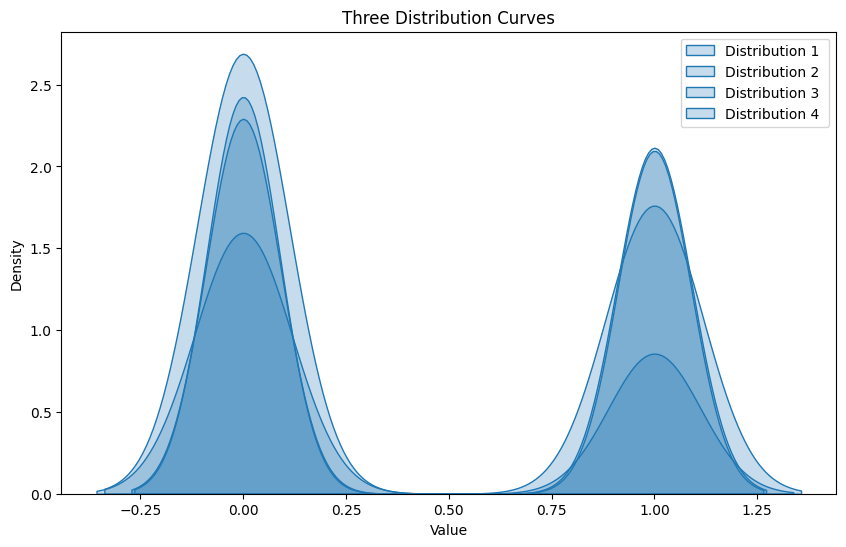

In [9]:
dist1 = y[0:5119]
dist2 = y[5120:6431]
dist3 = y[6432:7231]
dist4 = y[7232:]

plt.figure(figsize=(10, 6))

# Plot the first distribution using Seaborn's KDE plot
sns.kdeplot(dist1, shade=True, color="red", label="Distribution 1 ")

# Plot the second distribution
sns.kdeplot(dist2, shade=True, color="green", label="Distribution 2 ")

# Plot the third distribution
sns.kdeplot(dist3, shade=True, color="blue", label="Distribution 3 ")

sns.kdeplot(dist4, shade=True, color="purple", label="Distribution 4 ")

# Add a title and labels
plt.title("Three Distribution Curves")
plt.xlabel("Value")
plt.ylabel("Density")

# Add a legend
plt.legend()

## K-S Test with equal samples

In [10]:
y_test.shape

(11700, 1)

/opt/homebrew/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserW

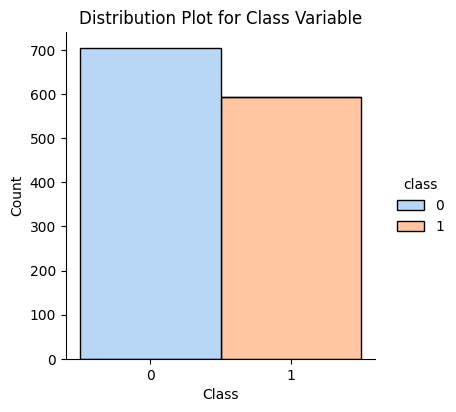

In [11]:
sns.displot(
    y_ref,
    x="class",
    hue="class",
    kind="hist",
    discrete=True,
    multiple="stack",
    height=4,
    aspect=1,
    palette="pastel",
)
plt.title("Distribution Plot for Class Variable")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks([0, 1])
plt.show()

/opt/homebrew/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserW

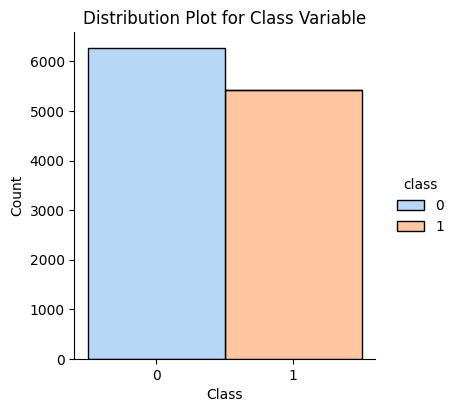

In [12]:
sns.displot(
    y_test,
    x="class",
    hue="class",
    kind="hist",
    discrete=True,
    multiple="stack",
    height=4,
    aspect=1,
    palette="pastel",
)
plt.title("Distribution Plot for Class Variable")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks([0, 1])
plt.show()

KS Test between reference sample and sample 1: KstestResult(statistic=0.09307692307692307, pvalue=2.5390659159498898e-05, statistic_location=0, statistic_sign=1)


/opt/homebrew/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserW

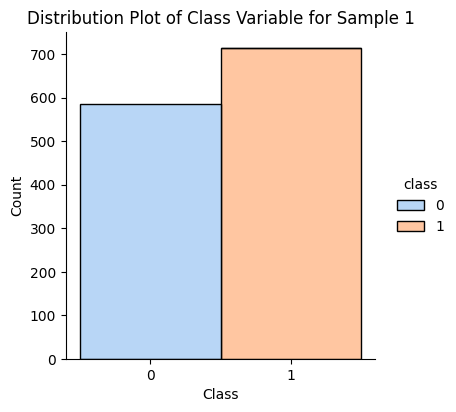

KS Test between reference sample and sample 2: KstestResult(statistic=0.010425771303369457, pvalue=0.9999992318298707, statistic_location=0, statistic_sign=-1)
KS Test between reference sample and sample 3: KstestResult(statistic=0.008819802214721383, pvalue=0.9999999981825192, statistic_location=0, statistic_sign=1)
KS Test between reference sample and sample 4: KstestResult(statistic=0.055009178658139396, pvalue=0.03721188897963236, statistic_location=0, statistic_sign=1)


/opt/homebrew/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserW

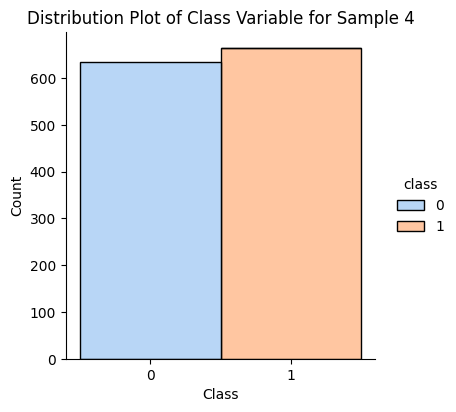

KS Test between reference sample and sample 5: KstestResult(statistic=0.10973293065671819, pvalue=2.63966179217302e-07, statistic_location=0, statistic_sign=-1)


/opt/homebrew/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserW

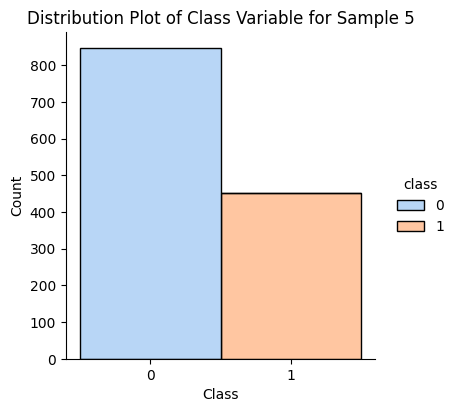

KS Test between reference sample and sample 6: KstestResult(statistic=0.028835198673535855, pvalue=0.6366085461734913, statistic_location=0, statistic_sign=1)
KS Test between reference sample and sample 7: KstestResult(statistic=0.01266891691833955, pvalue=0.9998934579504203, statistic_location=0, statistic_sign=1)
KS Test between reference sample and sample 8: KstestResult(statistic=0.02890152188073666, pvalue=0.6329351085071512, statistic_location=0, statistic_sign=-1)
KS Test between reference sample and sample 9: KstestResult(statistic=0.006510333392550483, pvalue=0.9999999999999958, statistic_location=0, statistic_sign=1)


In [13]:
sample_ref = y_ref["class"].values
j = 0
for i in range(1, 10):
    s_i = y_test[j : 1300 * i]
    j = (i * 1300) + 1
    sample_i = s_i["class"].values
    res = stats.ks_2samp(sample_ref, sample_i)
    print("KS Test between reference sample and sample {}: {}".format(i, res))
    if res.pvalue < 0.05:
        sns.displot(
            s_i,
            x="class",
            hue="class",
            kind="hist",
            discrete=True,
            multiple="stack",
            height=4,
            aspect=1,
            palette="pastel",
        )
        plt.title("Distribution Plot of Class Variable for Sample {}".format(i))
        plt.xlabel("Class")
        plt.ylabel("Count")
        plt.xticks([0, 1])
        plt.show()

## Sliding Window

In [14]:
y_reference = y[:100]
sample_reference = y_reference["class"].values
sample_test = list()
index = 100
while index < 13000:
    sample_test.append(y.iloc[index]["class"])
    res = stats.ks_2samp(sample_reference, sample_test)
    if res.pvalue < 0.05:
        print("Drift Detected at {}".format(index))
        y_reference = y[index : index + 100]
        sample_reference = y_reference["class"].values
        index = index + 100
        sample_test = []
    else:
        index += 1

Drift Detected at 224


### Rolling Window

In [15]:
window_size = 100
y_ref = y[:window_size]
sample_ref = y_ref["class"].values
index = 1
count = 1
while index < 13000 - window_size:
    y_test = y[index : index + window_size]
    sample_test = y_test["class"].values
    res = stats.ks_2samp(sample_ref, sample_test)
    if res.pvalue < 0.05:
        print("{} Drift detected at {}".format(count, index))
        count += 1
        y_ref = y_test
    index += window_size

1 Drift detected at 1301
2 Drift detected at 1901
3 Drift detected at 2101
4 Drift detected at 2201
5 Drift detected at 2301
6 Drift detected at 2401
7 Drift detected at 2501
8 Drift detected at 2801
9 Drift detected at 2901
10 Drift detected at 3001
11 Drift detected at 5201
12 Drift detected at 5301
13 Drift detected at 5401
14 Drift detected at 5501
15 Drift detected at 5601
16 Drift detected at 5701
17 Drift detected at 5801
18 Drift detected at 5901
19 Drift detected at 6001
20 Drift detected at 6501
21 Drift detected at 6601
22 Drift detected at 6701
23 Drift detected at 6801
24 Drift detected at 7301
25 Drift detected at 7801
26 Drift detected at 8101
27 Drift detected at 8201
28 Drift detected at 9801
29 Drift detected at 11001


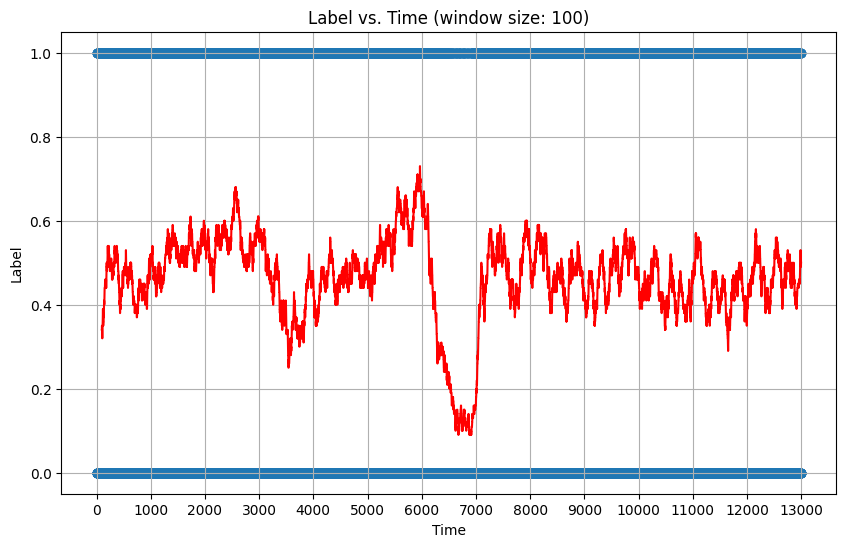

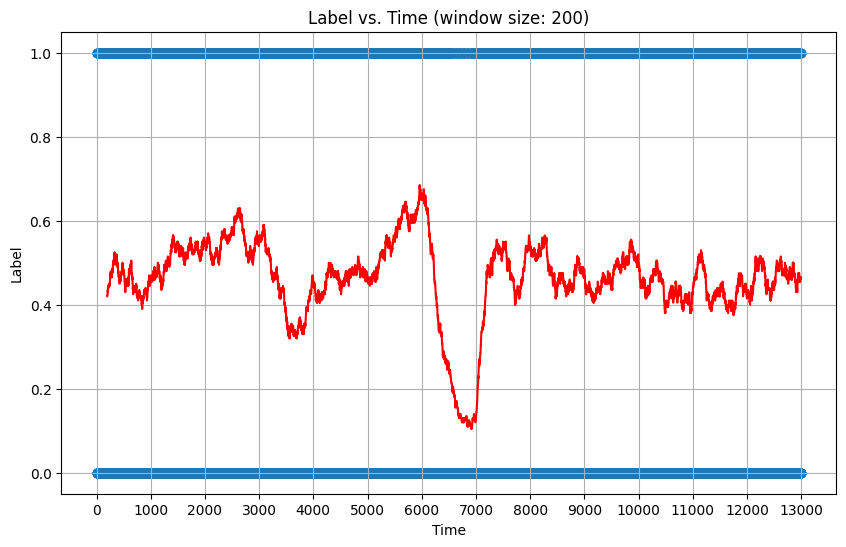

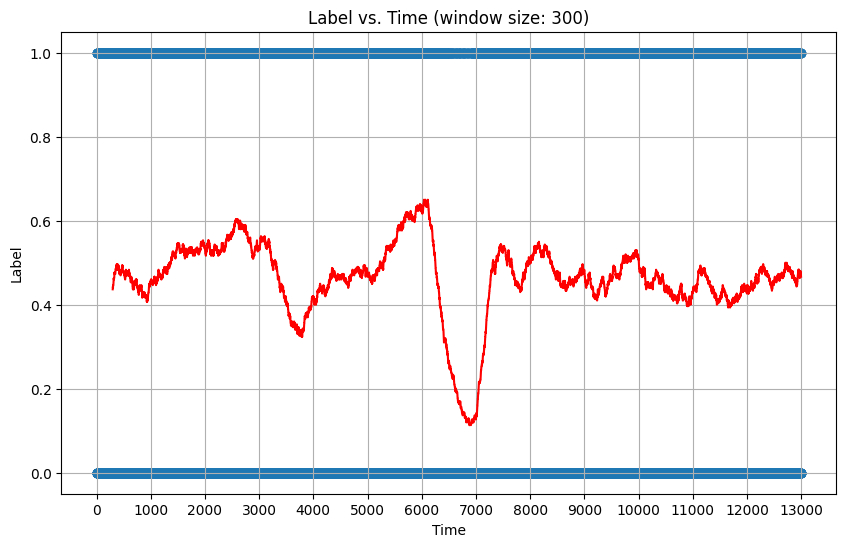

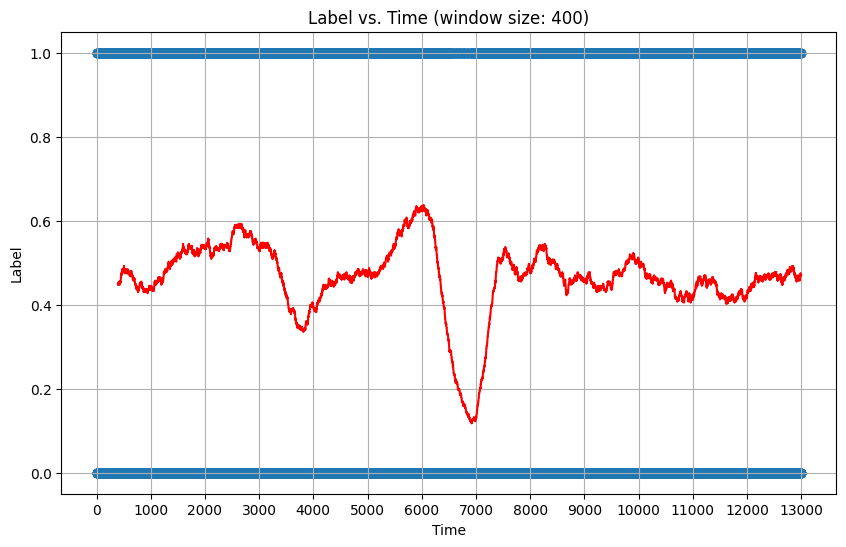

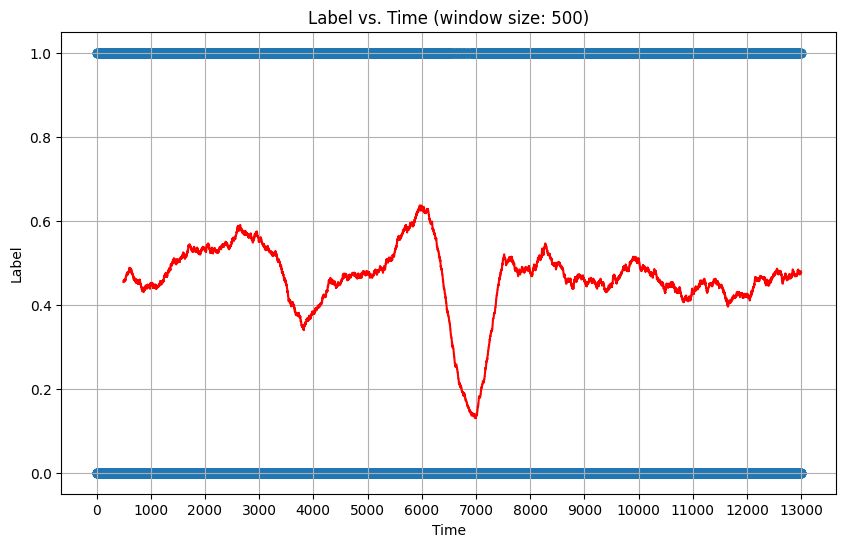

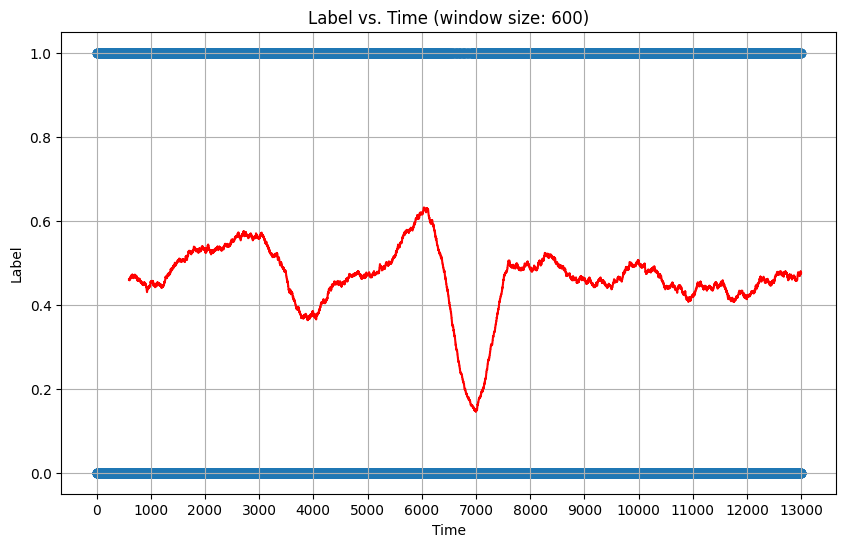

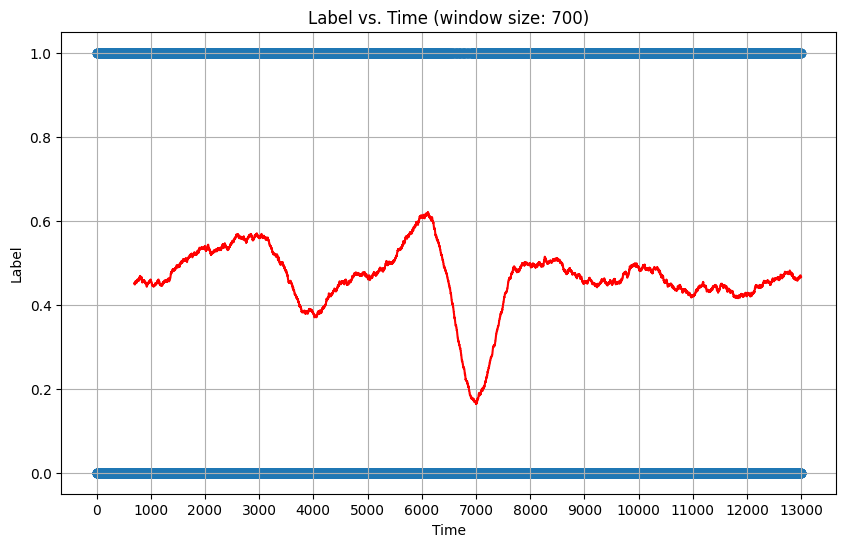

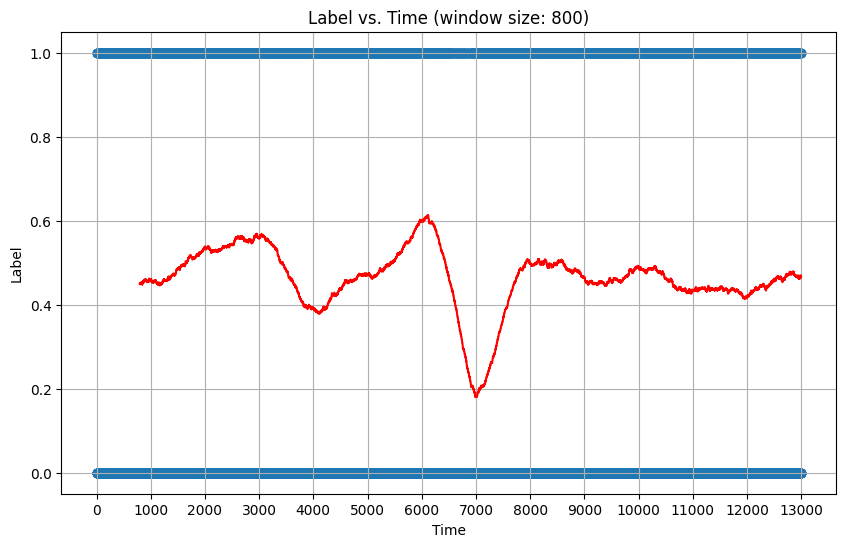

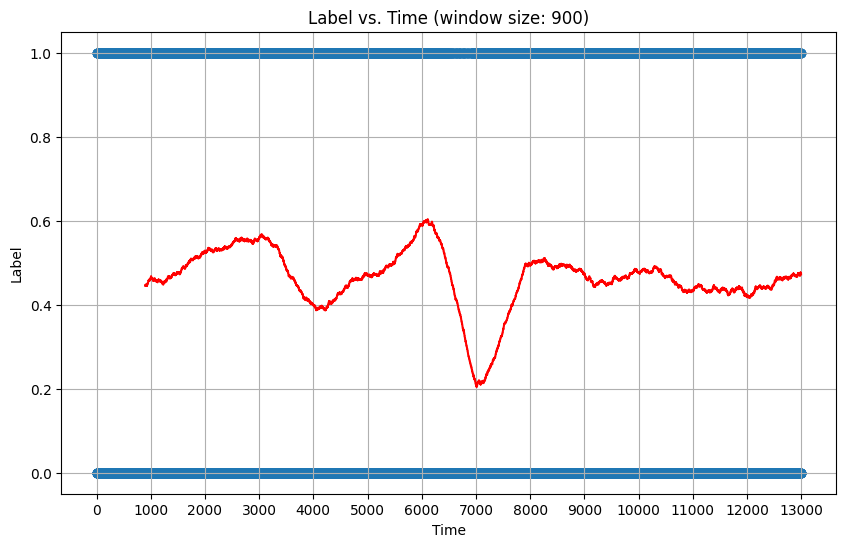

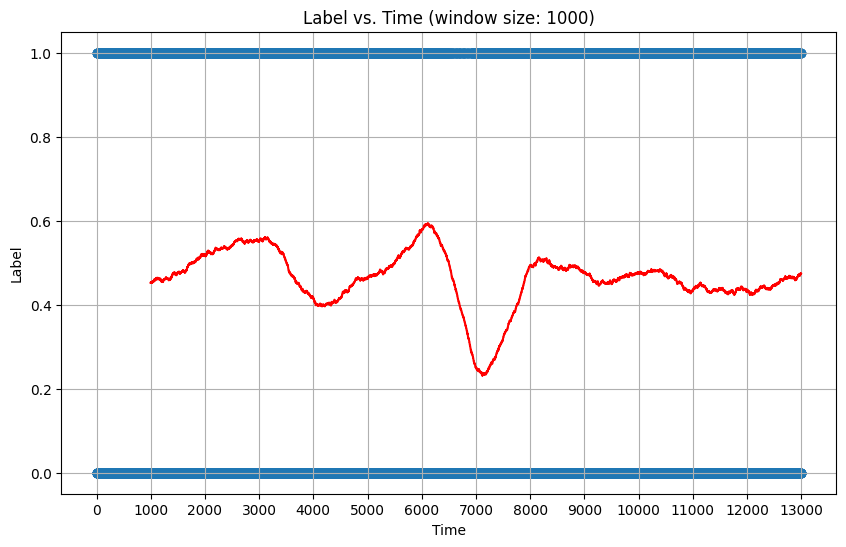

In [16]:
window_size = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

for size in window_size:
    # Plotting the line graph
    plt.figure(figsize=(10, 6))  # Optional: specify the size of the plot
    plt.scatter(
        y.index,
        y,
        marker="o",
    )

    # Calculate the moving mean of the feature
    moving_mean = y.rolling(window=size).mean()
    # Add a line for the moving mean
    plt.plot(
        y.index,
        moving_mean,
        color="red",
        linestyle="-",
        label=f"{y} Moving Mean",
    )

    plt.title(f"Label vs. Time (window size: {size})")
    plt.xlabel(f"Time")
    plt.ylabel(f"Label")
    plt.grid(True)
    # plt.yticks(np.arange(-11, 11, 1))
    plt.xticks(np.arange(0, 14000, 1000))
    plt.show()

## RollingWindow

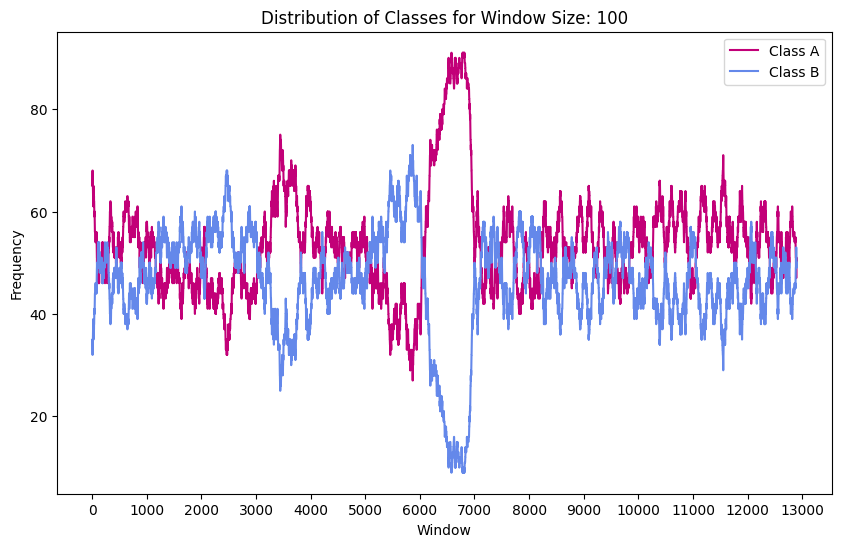

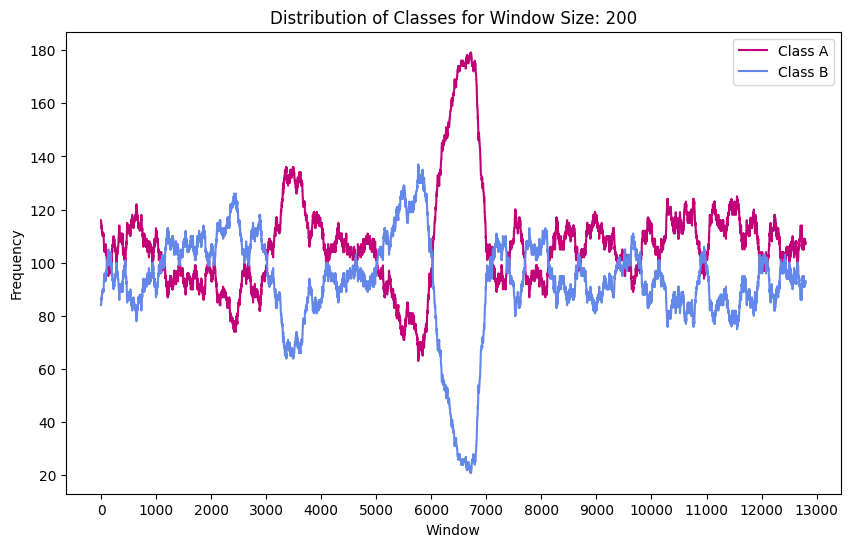

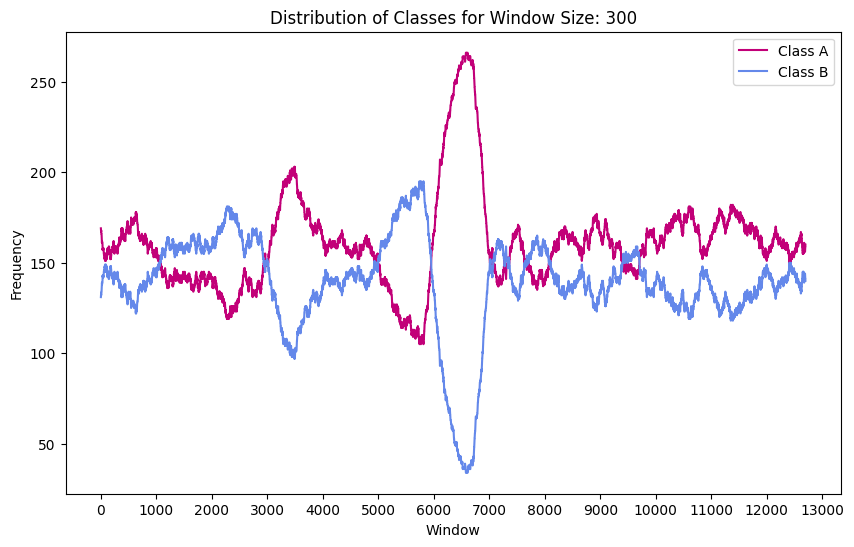

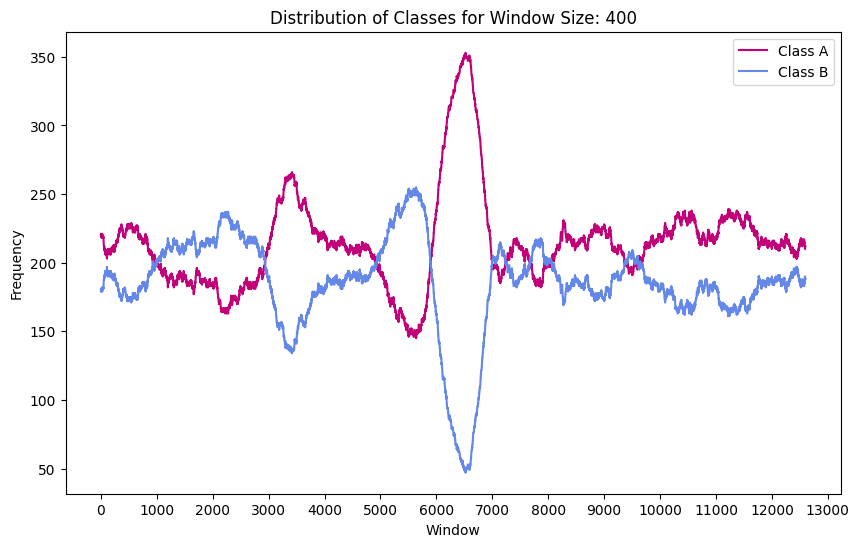

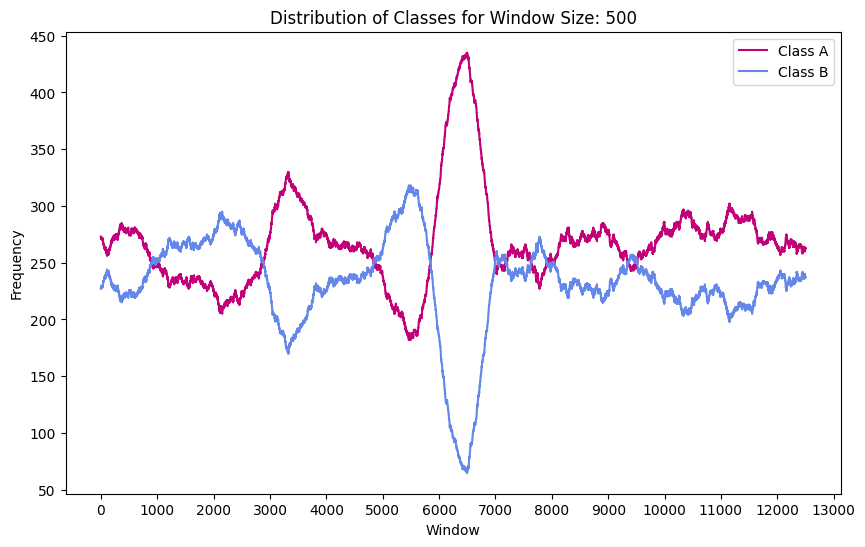

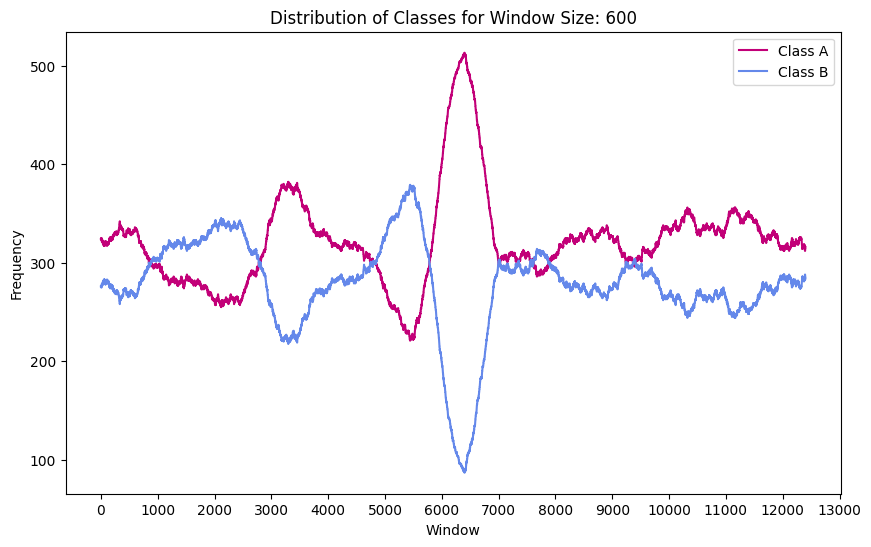

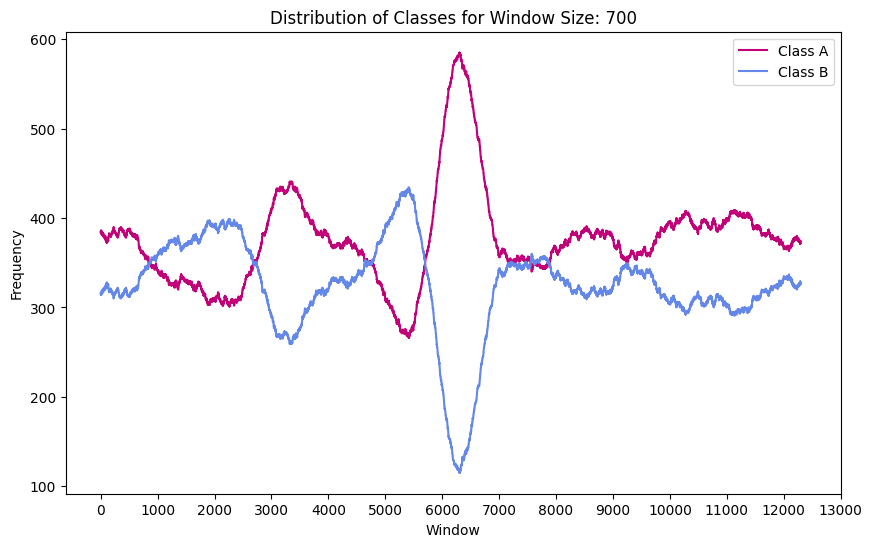

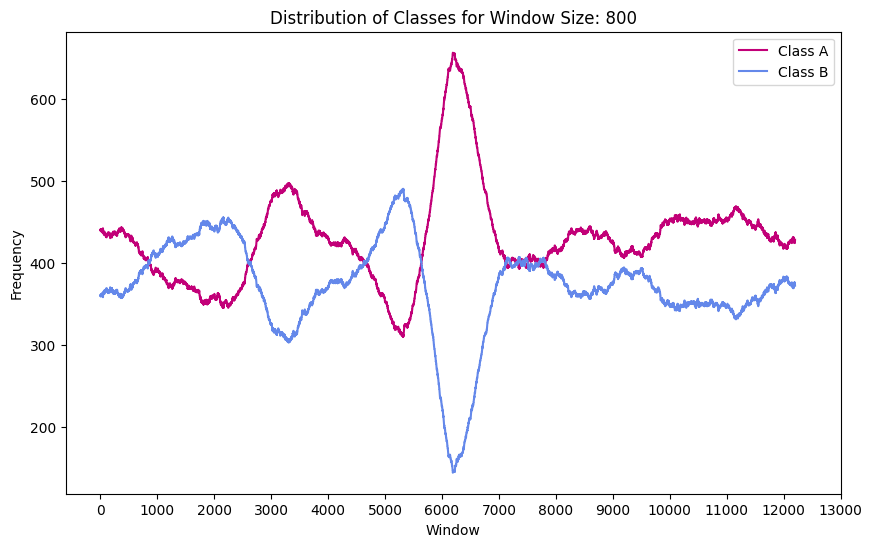

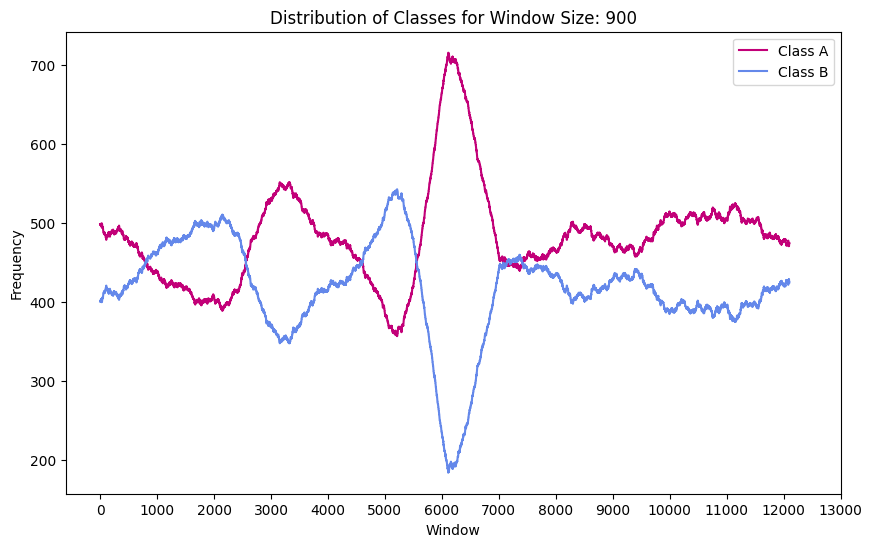

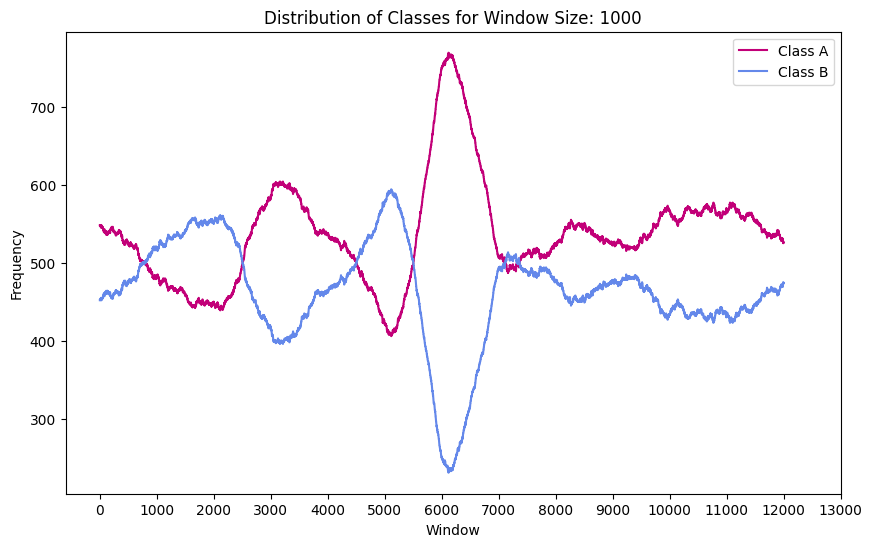

In [21]:
window_size = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

for window in window_size:
    index = window
    freq_line1 = []
    freq_line2 = []
    index = window
    while index < 13000:
        y_window = y[index - window : index]
        class_freq = y_window.value_counts()
        freq_line1.append(class_freq.get(0, 0))
        freq_line2.append(class_freq.get(1, 0))
        index += 1

    plt.figure(figsize=(10, 6))
    plt.plot(range(len(freq_line1)), freq_line1, color="#c20078", label="Class A")
    plt.plot(range(len(freq_line2)), freq_line2, color="#6488ea", label="Class B")

    plt.xticks(np.arange(0, 14000, 1000))
    plt.title("Distribution of Classes for Window Size: {}".format(window))
    plt.xlabel("Window")
    plt.ylabel("Frequency")
    plt.legend()

    plt.show()

In [19]:
window_size = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
for window in window_size:
    print("Window Size: {}".format(window))
    index = window
    count = 0
    ref_set = y[0:window]
    while index < 13000 - window:
        test_set = y[index - window : index]
        res = stats.ks_2samp(ref_set["class"].values, test_set["class"].values)
        if res.pvalue < 0.05:
            count += 1
            print("Drift Detected at {} ".format(index))
            ref_set = test_set
        index += 1
    print(count)

Window Size: 100
Drift Detected at 208 
Drift Detected at 3427 
Drift Detected at 4311 
Drift Detected at 6275 
Drift Detected at 6596 
Drift Detected at 7050 
Drift Detected at 7235 
Drift Detected at 10489 
Drift Detected at 11052 
Drift Detected at 11638 
Drift Detected at 12150 
11
Window Size: 200
Drift Detected at 1407 


/var/folders/0l/hg6b4m094qj3vxjz71xyxprm0000gn/T/ipykernel_2489/746177722.py:9: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = stats.ks_2samp(ref_set['class'].values, test_set['class'].values)


Drift Detected at 3377 
Drift Detected at 5351 
Drift Detected at 6263 
Drift Detected at 6389 
Drift Detected at 6675 
Drift Detected at 7079 
Drift Detected at 7176 
Drift Detected at 7977 
Drift Detected at 8471 
10
Window Size: 300
Drift Detected at 1932 
Drift Detected at 3387 
Drift Detected at 3786 
Drift Detected at 4093 
Drift Detected at 5474 
Drift Detected at 6316 
Drift Detected at 6408 
Drift Detected at 6602 
Drift Detected at 7173 
Drift Detected at 7253 
Drift Detected at 8164 
Drift Detected at 8654 
12
Window Size: 400
Drift Detected at 1598 
Drift Detected at 3445 
Drift Detected at 3700 
Drift Detected at 4186 
Drift Detected at 5482 
Drift Detected at 6351 
Drift Detected at 6457 
Drift Detected at 6576 
Drift Detected at 6797 
Drift Detected at 7154 
Drift Detected at 7242 
Drift Detected at 7354 
Drift Detected at 8267 
Drift Detected at 8625 
14
Window Size: 500
Drift Detected at 1696 
Drift Detected at 3488 
Drift Detected at 3764 
Drift Detected at 4284 
Drif

## Sliding Window

In [23]:
window_size = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
for window in window_size:
    print("Window Size: {}".format(window))
    index = window
    count = 0
    ref_set = y[0:window]
    while index < 13000 - window:
        test_set = y[index : index + window]
        res = stats.ks_2samp(ref_set["class"].values, test_set["class"].values)
        if res.pvalue < 0.05:
            count += 1
            print("Drift Detected at {} ".format(index))
            ref_set = test_set
        index += window
    print(count)

Window Size: 100
Drift Detected at 1200 
Drift Detected at 3500 
Drift Detected at 4200 
Drift Detected at 6200 
Drift Detected at 6800 
Drift Detected at 7000 
6
Window Size: 200
Drift Detected at 2200 
Drift Detected at 3400 
Drift Detected at 5000 
Drift Detected at 5800 
Drift Detected at 6200 
Drift Detected at 6600 
Drift Detected at 7000 
7
Window Size: 300
Drift Detected at 2100 
Drift Detected at 3300 
Drift Detected at 4200 
Drift Detected at 5400 
Drift Detected at 6000 
Drift Detected at 6300 
Drift Detected at 6900 
Drift Detected at 7200 
Drift Detected at 11400 
9
Window Size: 400
Drift Detected at 2400 
Drift Detected at 3200 
Drift Detected at 5200 
Drift Detected at 6000 
Drift Detected at 6400 
Drift Detected at 6800 
Drift Detected at 7200 
Drift Detected at 10400 
8
Window Size: 500
Drift Detected at 2000 
Drift Detected at 3000 
Drift Detected at 5500 
Drift Detected at 6000 
Drift Detected at 6500 
Drift Detected at 7000 
Drift Detected at 11500 
7
Window Size: 6

/var/folders/0l/hg6b4m094qj3vxjz71xyxprm0000gn/T/ipykernel_2489/921000420.py:9: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = stats.ks_2samp(ref_set['class'].values, test_set['class'].values)
